# Happy House Dataset
人が笑うかどうかの画像認識  
https://www.kaggle.com/iarunava/happy-house-dataset/home

### 1、データをインポート  


In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from PIL import Image 
%matplotlib inline

C:\Users\ko_kaku\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

In [3]:
path_to_train = './smile/train_happy.h5'
path_to_test = './smile/test_happy.h5'
train_x, train_y, test_x, test_y = load_dataset(path_to_train, path_to_test)

### 2、データを整形 観察

In [4]:
train_x = train_x/255.
test_x = test_x/255.
train_y = train_y[0]
test_y = test_y[0]
print ("number of training examples = " + str(train_x.shape[0]))
print ("number of test examples = " + str(test_x.shape[0]))
print ("X_train shape: " + str(train_x.shape))
print ("Y_train shape: " + str(train_y.shape))
print ("X_test shape: " + str(train_y.shape))
print ("Y_test shape: " + str(test_y.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600,)
X_test shape: (600,)
Y_test shape: (150,)


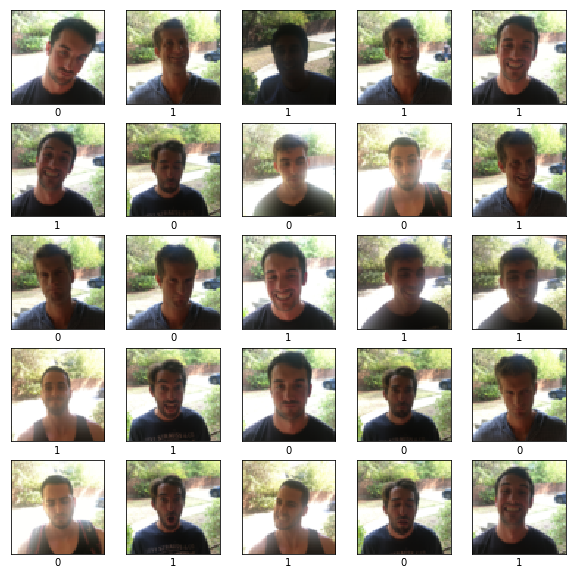

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i])
    plt.xlabel(train_y[i])

推測ですが、  
口を開けて、歯を出している人が笑っている人です。  
1行目左から3番目のような、暗い画像もあります。  


### モデリング

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import Activation,Dropout
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam

# from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

Using TensorFlow backend.


#### 自作のモデル 

In [7]:
model = Sequential()
model.add(Conv2D(filters=4, kernel_size=(2,2), padding='valid', \
                 activation='relu',input_shape=(64,64,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=8, kernel_size=(2,2), padding='valid', \
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=16, kernel_size=(2,2), padding='valid', \
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(GlobalAveragePooling2D(data_format='channels_last'))

model.add(Dense(units = 2, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 63, 63, 4)         52        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 8)         136       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 16)        528       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 16)                0         
__________

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
epochs = 70
model.fit(train_x,train_y,epochs=epochs,batch_size=20,verbose=1)

Epoch 1/70
600/600 [==============================] - 3s 5ms/step - loss: 0.6939 - acc: 0.5000
Epoch 2/70
600/600 [==============================] - 3s 4ms/step - loss: 0.6931 - acc: 0.5000
Epoch 3/70
600/600 [==============================] - 3s 4ms/step - loss: 0.6932 - acc: 0.4967
Epoch 4/70
600/600 [==============================] - 3s 4ms/step - loss: 0.6929 - acc: 0.5717
Epoch 5/70
600/600 [==============================] - 3s 4ms/step - loss: 0.6928 - acc: 0.5000
Epoch 6/70
600/600 [==============================] - 3s 4ms/step - loss: 0.6928 - acc: 0.5117
Epoch 7/70
600/600 [==============================] - 2s 4ms/step - loss: 0.6926 - acc: 0.5283
Epoch 8/70
600/600 [==============================] - 3s 4ms/step - loss: 0.6927 - acc: 0.4950
Epoch 9/70
600/600 [==============================] - 3s 4ms/step - loss: 0.6923 - acc: 0.5517
Epoch 10/70
600/600 [==============================] - 3s 4ms/step - loss: 0.6923 - acc: 0.5467
Epoch 11/70
600/600 [============================

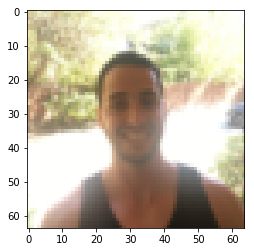

In [9]:
plt.imshow(test_x[0])

In [10]:
print(test_x[0].shape)
test_single = np.expand_dims(test_x[0], axis=0)
print(test_single.shape)

(64, 64, 3)
(1, 64, 64, 3)


In [11]:
y_pred = model.predict_classes(test_single)
y_pred

array([1], dtype=int64)

In [12]:
y_pred = model.predict_classes(test_x)
print ("test accuracy: %s" %accuracy_score(test_y, y_pred))
print ("precision: %s"  %precision_score(test_y, y_pred))
print ("recall: %s" %recall_score(test_y, y_pred))
print ("f1 score: %s"  %f1_score(test_y, y_pred))
cm = confusion_matrix(test_y,y_pred)
cm

test accuracy: 0.8066666666666666
precision: 0.9508196721311475
recall: 0.6904761904761905
f1 score: 0.7999999999999999


array([[63,  3],
       [26, 58]], dtype=int64)

#### 次のところは、この人のモデルをコピーしました。  
https://www.kaggle.com/tstember/happy-house-dataset

In [14]:
model2 = Sequential()

model2.add(Conv2D(64,(5,5), padding = 'Same', activation = 'relu', input_shape = (64,64,3)))
model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Dropout(0.1))

model2.add(Conv2D(64, (5,5), padding = 'Same', activation = 'relu'))
model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Dropout(0.1))

model2.add(Flatten())
model2.add(Dense(128, activation = 'relu'))

model2.add(Dense(units = 1, activation = 'sigmoid'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 64)        4864      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)        0         
__________

In [15]:
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model2.fit(train_x,train_y,epochs=10 ,batch_size=20,verbose=1)

Epoch 1/10
600/600 [==============================] - 46s 77ms/step - loss: 7.8978 - acc: 0.4933
Epoch 2/10
600/600 [==============================] - 47s 79ms/step - loss: 8.0590 - acc: 0.5000
Epoch 3/10
600/600 [==============================] - 48s 80ms/step - loss: 8.0590 - acc: 0.5000
Epoch 4/10
600/600 [==============================] - 59s 98ms/step - loss: 8.0590 - acc: 0.5000
Epoch 5/10
600/600 [==============================] - 51s 85ms/step - loss: 8.0590 - acc: 0.5000
Epoch 6/10
600/600 [==============================] - 45s 76ms/step - loss: 8.0590 - acc: 0.5000
Epoch 7/10
600/600 [==============================] - 46s 77ms/step - loss: 8.0590 - acc: 0.5000
Epoch 8/10
600/600 [==============================] - 56s 93ms/step - loss: 8.0590 - acc: 0.5000
Epoch 9/10
600/600 [==============================] - 51s 84ms/step - loss: 8.0590 - acc: 0.5000
Epoch 10/10
600/600 [==============================] - 46s 77ms/step - loss: 8.0590 - acc: 0.5000


In [16]:
y_pred = model2.predict_classes(test_single)
y_pred

array([[0]])

In [17]:
y_pred = model2.predict_classes(test_x)
print ("test accuracy: %s" %accuracy_score(test_y, y_pred))
print ("precision: %s"  %precision_score(test_y, y_pred))
print ("recall: %s" %recall_score(test_y, y_pred))
print ("f1 score: %s"  %f1_score(test_y, y_pred))
cm = confusion_matrix(test_y,y_pred)
cm

test accuracy: 0.44
precision: 0.0
recall: 0.0
f1 score: 0.0


C:\Users\ko_kaku\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ko_kaku\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[66,  0],
       [84,  0]], dtype=int64)

### 12.26モデルの比較とまとめ  

自作のモデル  
-----Conv2D-----  
-----MaxPooling2D-----  
-----Conv2D-----  
-----MaxPooling2D-----  
-----Conv2D-----  
-----MaxPooling2D-----  
-----GlobalAveragePooling2D-----  
-----MaxPooling2D-----  
-----Dense----- 

いいモデル
-----Conv2D-----  
-----BatchNormalization-----  
-----MaxPooling2D-----  
-----Dropout-----  
-----BatchNormalization-----  
-----MaxPooling2D-----  
-----Dropout-----  
-----Flatten-----  
-----Dense-----  
-----Dense-----  

1、とにかく、折り畳みをしないと意味ない  
2、折り畳みに関して、filtersはフィルター数、  
　　kernel_sizeはフィルターサイズ  
　　stridesフィルターのスライドのピクセル（）  
　　activationはrelu  
3、maxpooling 次元削減  
　　MaxPooling2D(pool_size=(2,2))の場合は、画像の横の縦の1/2にする  
4、BatchNormalization  
　　層が深くなると、深い層が浅い層の同じところでも、全然違うようになってくる  
　　正規化することで、この「全然違う」を抑えることができます。  
5、Dropoutは省略  
6、出力を考えます。  
　　出力は、特徴に変換して、softmaxとかに入れてクラスを分類できます。  
　　出力する前に特徴に変換しなければならない  
　　特徴に変換するやり方は2つあります。  
　　GlobalAveragePooling2Dか、full connectedかのどちらかです。  
7、GlobalAveragePooling2Dは、カーネルごとに平均値をとって、1次元のベクトルになる  
8、denseに関して、
　　-----Flatten-----  
　　-----Dense-----  
　　ベクトルを平たいにして、全結合  
  
9、出力層、sigmodまたはsoftmaxですが、  
　sigmodは2分類、softmaxは多分類  
　（私のモデルは、間違い！）  

10、(Convolution * N + (Pooling)) * M + Fully Connected * K  

Nは~5くらいで、これをM層重ねて(Mは結構大きな値)、最後に判定のためのFCをK層(0<=K<=2)設けるという感じです(分類問題を扱うため、これにSoftMax関数を使った層をつけることもあります)。活性化関数としてはReLUが使用されることが多いです。

#### モデル①
model.add(Conv2D(filters=4, kernel_size=(2,2), padding='valid', \
                 activation='relu',input_shape=(64,64,3)))  
model.add(MaxPooling2D(pool_size=(2,2)))  

model.add(Conv2D(filters=8, kernel_size=(2,2), padding='valid', \
                 activation='relu'))  
model.add(MaxPooling2D(pool_size=(2,2)))  

model.add(Conv2D(filters=16, kernel_size=(2,2), padding='valid', \
                 activation='relu'))  
model.add(MaxPooling2D(pool_size=(2,2)))  

model.add(GlobalAveragePooling2D(data_format='channels_last'))  
model.add(Dense(2, activation='softmax'))  

#### モデル②  
model2.add(Conv2D(64,(5,5), padding = 'Same', activation = 'relu', input_shape = (64,64,3)))  
model2.add(BatchNormalization())  

model2.add(MaxPooling2D(pool_size = (2,2)))  
model2.add(Dropout(0.1))  

model2.add(Conv2D(64, (5,5), padding = 'Same', activation = 'relu'))  
model2.add(BatchNormalization())  

model2.add(MaxPooling2D(pool_size = (2,2)))  
model2.add(Dropout(0.1))  

model2.add(Flatten())  
model2.add(Dense(128, activation = 'relu'))  

model2.add(Dense(units = 1,kernel_initializer="uniform", activation = 'sigmoid'))  

### モデルを検証

In [18]:
from keras.preprocessing import image

In [19]:
def predict_picture(picture_path):

    img = image.load_img(picture_path)
#     img.transform(size=)
    plt.imshow(img)
    img = image.load_img(picture_path,target_size=(64, 64))
    x = image.img_to_array(img)
   
    x = np.expand_dims(x, axis=0)
    x = x/255.
    
    smile_result = model.predict_classes(x)
    
    if smile_result[0] == 0:
        print('He/She look unhappy')
    else:
        print('Looks,He/She is smiling!')

In [20]:
picture_path1 = './smile/1.jpg'
picture_path2 = './smile/2.jpg'
picture_path3 = './smile/3.jpg'
picture_path4 = './smile/4.jpg'

He/She look unhappy


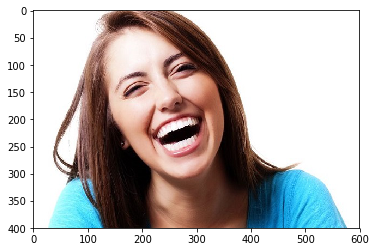

In [21]:
predict_picture(picture_path1)

He/She look unhappy


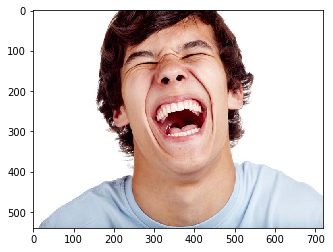

In [22]:
predict_picture(picture_path2)

Looks,He/She is smiling!


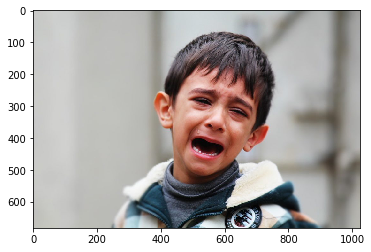

In [23]:
predict_picture(picture_path3)

He/She look unhappy


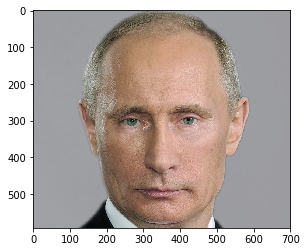

In [24]:
predict_picture(picture_path4)

### 結論  （12.25）
自作モデルと他人モデルに関して、  
単純に与えられたテストデータと訓練データを比べるなら、  
他人のモデルのパフォーマンスが圧倒的にいいと思います。  
精度は全然違います。  

ただし、そちらのモデルに関しては、あくまでも、今回のトレインデータ、バリエーションデータ、テストデータに対してのいいモデルです。  
データを観察するときに、与えられたでデータセットは全部似たような感じのデータです。  
例えば背景が似ているとか、人が似ているとか、  

自分が探してきた全然違う感じの顔画像をモデルに入れてみました。  
自分のモデルは、全部予測できました。  
他人のモデルは、全部外れました。  

つまり、他人のモデルに関して、今回のデータに対して過学習が起こっています。  
私のモデルなら、精度はまだまだですが、過学習は起きていないです。  

### 12.26補充  
そもそも、sigmoid softmaxの使い方の問題で、精度を上げられなかったです。  
正しくsigmoidに変更すると、自作のモデルの精度も上げました。  
精度は「いいモデル」と比べて悪い原因として、  
1、「いいモデル」が正規化しました  
2、「いいモデル」がdropoutしています
とかが考えられる。  
しかし、精度が挙げた一方で、今回のテストデータとトレインデータへの当てはまりが良すぎて、新しい取り入れた笑顔などをうまく予測できていない

### additional :移転学習

vgg16 vgg19以外、xceptionなど有名かつ高速のモデルはありますが、  
残念ながら、input_shapeに制限があります。xceptionの場合　少なくとも71×71以上の画像を入れないといけないです。  
vgg16　vgg19の場合、処理スピードが遅いです。  
ここは、本当に遅すぎて、あきらめました。

In [43]:
# from keras.layers import Input, Dense, Dropout, Activation, Flatten, Lambda
# from keras.applications.vgg16 import VGG16
# from keras.applications.vgg16 import preprocess_input
# from keras.applications.vgg16 import decode_predictions


In [45]:
# model = VGG16(include_top=False,input_shape=(64,64,3), weights='imagenet',pooling='max',classes=2)
# model.summary()

In [ ]:
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# epochs = 10
# model.fit(train_x,train_y,epochs=epochs,batch_size=20,verbose=1)

In [ ]:
# def predict_picture(picture_path):

#     img = image.load_img(picture_path)
# #     img.transform(size=)
#     plt.imshow(img)
#     img = image.load_img(picture_path,target_size=(64, 64))
#     x = image.img_to_array(img)
   
#     x = np.expand_dims(x, axis=0)
#     x = x/255.
    
#     preds = model.predict(preprocess_input(x))
#     results = decode_predictions(preds, top=5)[0]
#     print(decoded_result)
    

In [ ]:
# predict_picture(picture_path1)